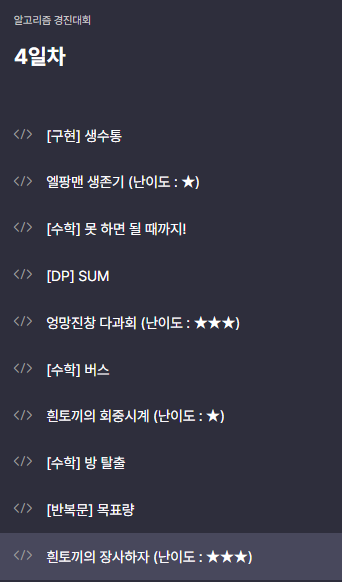

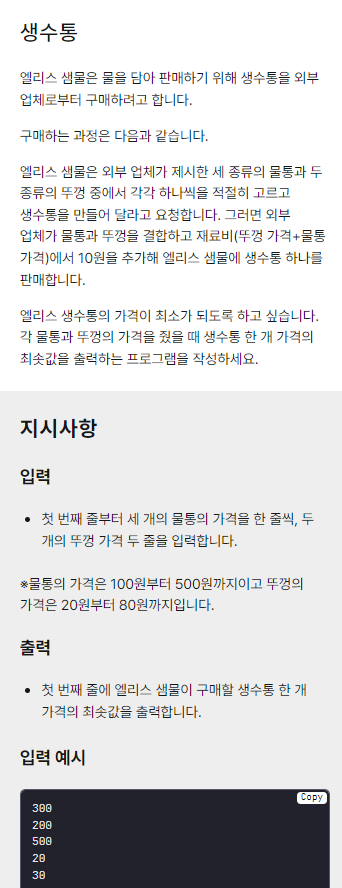

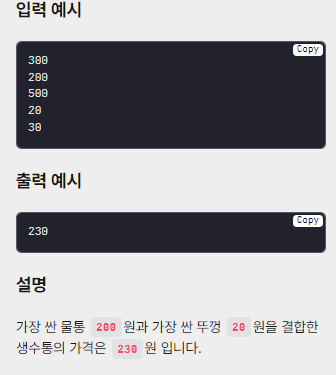

# ex01(구현)

In [9]:
water_list = [int(input()) for _ in range(5)]
a = min(water_list[:3])
b = min(water_list[3:])
print(a+b+10)

300
200
500
20
30
230


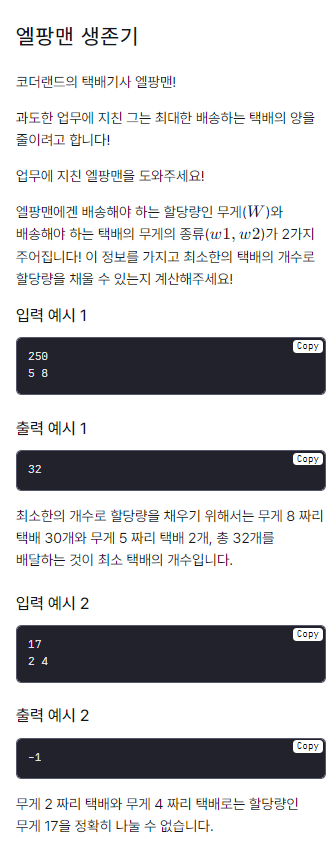

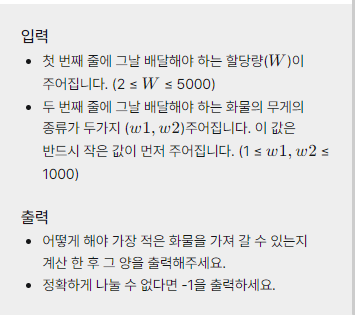

# ex02(시뮬레이션)

In [14]:
weight = int(input())
w1, w2 = map(int,input().split())

cnt = 0

fail = 987654321

while weight>=0:
    if weight % w2 == 0:
        fail = min(fail, cnt + weight // w2)
    weight -= w1
    cnt += 1
    
if fail == 987654321:
    print(-1)
else:
    print(fail)

250
10 20
13


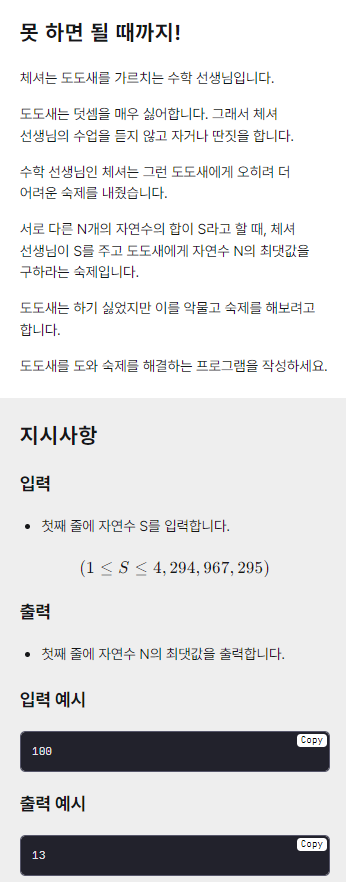

# ex03(수학 백준 1789)
- 1부터 더해가서 S보다 큰값이 되는 N-1이 최댓값

In [22]:
S = int(input())
N = 0
result = 0
for i in range(1,S+1):
    result += i
    N += 1
    if(result > S):
        N -= 1
        break;
print(N)

100
13


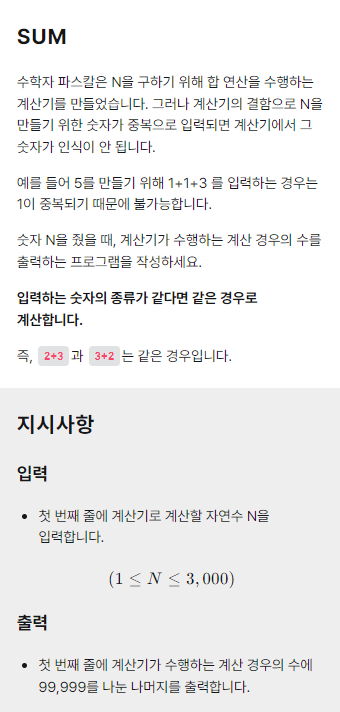

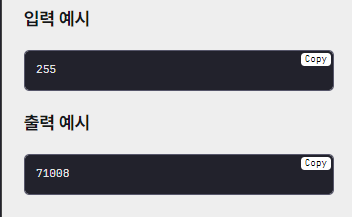

# ex04(DP)
- https://comengin.tistory.com/m/383
- https://intrepidgeeks.com/tutorial/9764-sum-of-different-natural-numbers

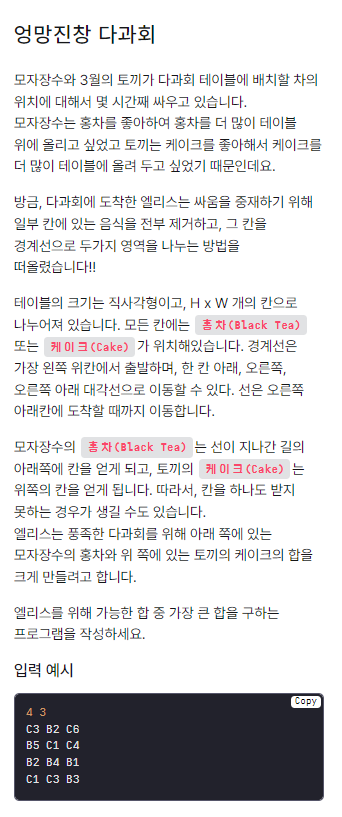

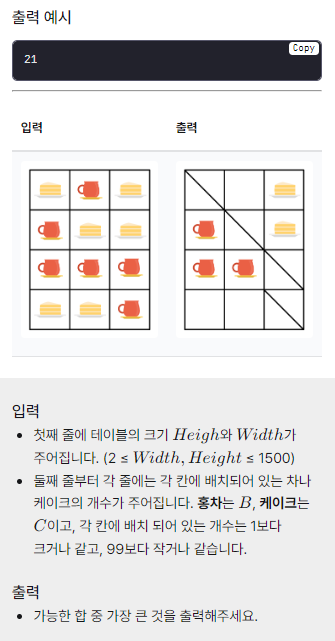

# ex05(시뮬레이션)

In [ ]:
h,w = map(int,input().split())

table = []

b = [[0] * (w+2) for i in range(h+1)]
c = [[0] * (w+2) for i in range(h+1)]
dp = [[0] * (w+2) for i in range(h+1)]


for i in range(h):
    table.append(input().split())

for i in range(h):
    for j in range(w):
        if (table[i][j][:1] == "B"):
            b[i+1][j+1] += int(table[i][j][1:])
        else:
            c[i+1][j+1] += int(table[i][j][1:])

for i in range(1, h+1):
    for j in range(1, w+1):
        b[i][j] += b[i][j-1]
        c[i][w-j+1] += c[i][w-j+2] 

for i in range(1, h+1):
    for j in range(1, w+1):
        if (i == 1 or j == 1):
            dp[i][j] = dp[i-1][j] + c[i][j+1]
            continue
        dp[i][j] = max(dp[i-1][j-1], dp[i-1][j]) + b[i][j-1] + c[i][j+1]
        dp[i][j] = max(dp[i][j], dp[i][j-1] - c[i][j] + c[i][j+1])

print(dp[h][w])

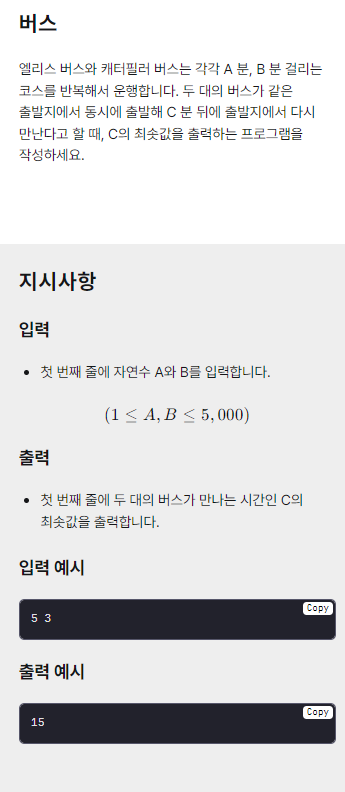

# ex06 (수학)
- 최소 공배수 구하기

In [25]:
# 내가푼거
A, B = map(int,input().split())

if A % B == 0:
    C = A
if A % B != 0:
    C = A * B
if B % A == 0:
    C = B
if B % A != 0:
    C = A * B

print(C)

10 5
50


In [ ]:
# 알고리즘
# num = int(input())
for i in range(1):
    a,b = map(int,input().split())
    A,B = a,b
    while a!=0:
        b = b%a
        a,b = b,a   
    Max = b
    bus = A * B //b
    print(bus)

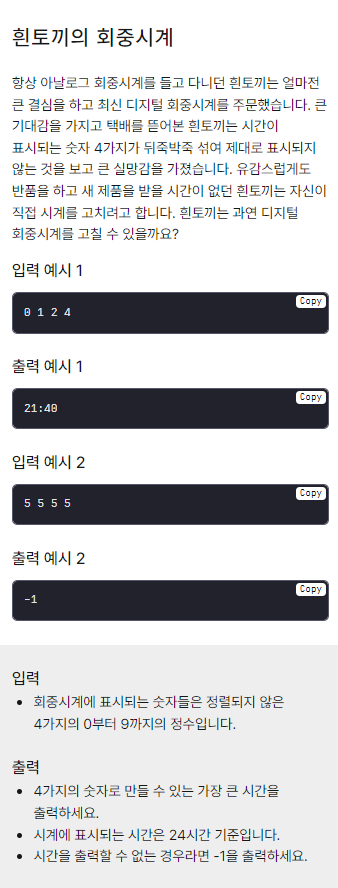

# ex07 (완전 탐색)

In [40]:
Max = -1

def ham(arr, c, che, re):
    if c == len(re):
        if int(re[0]) > 2:
            return 
        if int(re[0]) == 2 and int(re[1]) > 3:
            return
        if int(re[2]) > 5:
            return
        #print(re)
        global Max
        Max = max(Max,int(''.join(re)))
        return 
        
    for i in range(len(arr)):
        if che[i]:
            continue
        re[c] = arr[i]
        che[i] = True
        ham(arr, c+1, che, re)
        che[i] = False
        
    
arr = list(input().split())

che = [False for i in range(4)]

re = [0 for i in range(4)]

ham(arr,0,che,re)

if Max == -1 :
    print(-1)
else:
    print(str(Max)[:2]+":"+str(Max)[2:])

3 0 9 2
23:09


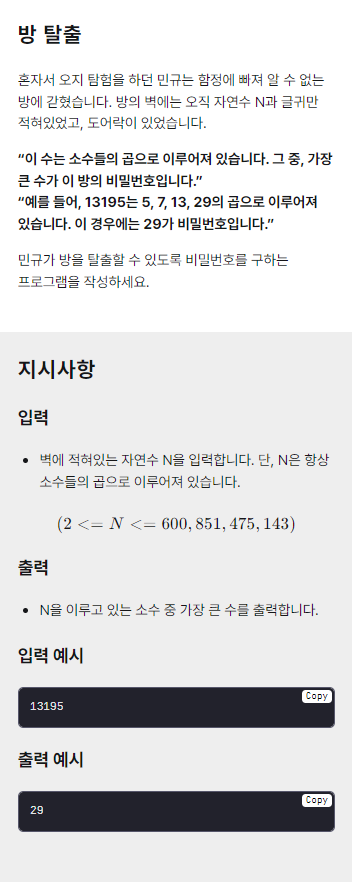

# ex08 (수학)
- 소인수 분해
- 가장 큰 소인수 구하기

In [35]:
N = int(input())  # 나누어지는 수
d = 2  # 나누는 수

while N != 1:
    if N % d != 0:
        d += 1
    else:
        N //= d
        print(d)

13195
5
7
13
29


In [38]:
N = int(input())
# 소인수 리스트
arr = []
# 최초로 나눌 가장 작은 소수
d = 2
while N > 1:
    if N % d == 0:
        N /= d
        arr.append(d)
    elif N == 1:
        break
    else:
        d += 1
print(max(arr))

13195
29


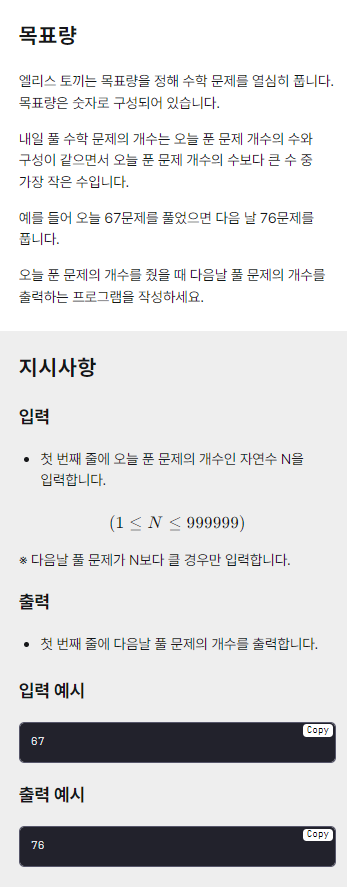

# ex09 (반복문)

In [34]:
# 순열로 만들어주는 라이브러리
from itertools import permutations

N = input()

permu = (sorted(set(map(lambda x: ''.join(x), permutations(N, len(N))))))
print(0) if permu[-1] == N else print(permu[permu.index(N) + 1])

67
76


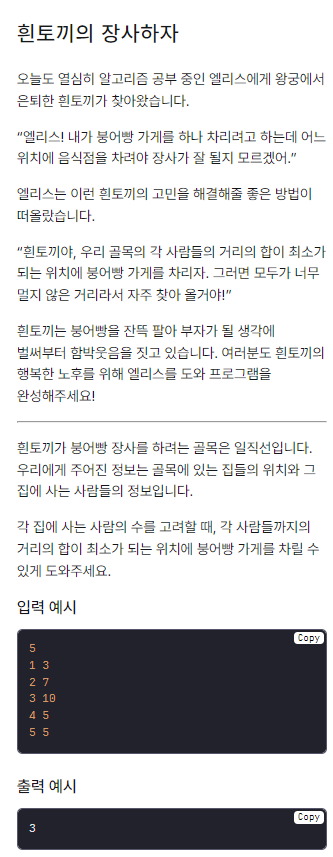

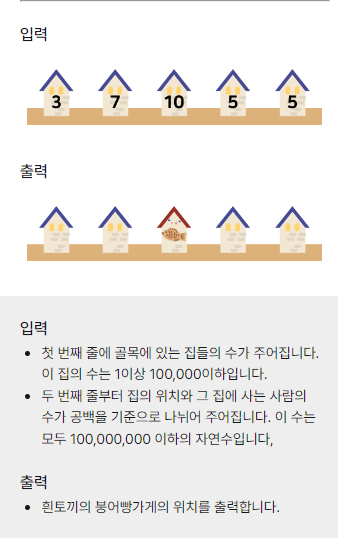

# ex10 (정렬)

In [ ]:
N = int(input())

location_num = []

Max = 0

for i in range(N):
    location_num.append(list(map(int, input().split())))
    Max = max(Max, location_num[i][0])

location_num.sort()

Sum = 0
left = 0
right = 0

arr = [0 for i in range(Max+1)]

for i in range(N):
    arr[location_num[i][0]] = location_num[i][1]
    
#print(arr)

for i in range(location_num[0][0]+1,Max+1):
    Sum+=arr[i]*(i-1)
    right+=arr[i]

Min = 999999999999999999
Min_index = 0

#print(Sum)
#print()

if Min > Sum:
    Min = Sum
    Min_index = location_num[0][0]

for i in range(location_num[0][0]+1,Max+1):
    left+=arr[i-1]
    Sum-=right
    Sum+=left
    right-=arr[i]
    #print(Sum, left, right)
    if Min > Sum:
        Min = Sum
        Min_index = i
print(Min_index)